In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [89]:
class system:
    def __init__(self, limit, delta):
        self.limit = limit
        self.delta = delta
        self.charges = []
        self.create_map()

    def create_map(self):
        self.map = np.arange(-inputs["limits"],
                             inputs["limits"] + inputs["delta"],
                             inputs["delta"])
        self.len = len(self.map)

    def add_particle(self, q, r):
        particle = charge(q, r)
        self.charges.append(particle)

    def calc_field(self):
        self.field = np.zeros((2, self.len, self.len))
        for i in range(self.len):
            for j in range(self.len):
                r_i = [self.map[i], self.map[j]]
                for charge in self.charges:
                    charge.calc_field(r_i)
                    self.field[:, i, j] += charge.field

    def calc_potential(self):
        self.potential = np.zeros((self.len, self.len))
        for i in range(self.len):
            for j in range(self.len):
                r_i = [self.map[i], self.map[j]]
                for charge in self.charges:
                    charge.calc_potential(r_i)
                    self.potential[i, j] += charge.potential

    def plot_charges(self,ax):
        for charge in self.charges:
            y, x = charge.r
            ax.scatter(x, y, color="red")

    def plot_field(self,ax=plt):
        if ax==plt:
            fig,ax=plt.subplots(1,1)
        ax.set_title("Electric field")
        ax.set_xticks([])
        ax.set_yticks([])
        self.plot_charges(ax)
        ax.quiver(self.map, self.map, self.field[1], self.field[0])
        if ax==plt:
            plt.show()

    def plot_potential(self,ax=plt):
        if ax==plt:
            fig,ax=plt.subplots(1,1)
        ax.set_title("Electric potential")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(self.potential, cmap="inferno_r")
        if ax==plt:
            plt.show()
        
    def plot_potential_and_field(self):
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))
        self.plot_field(ax=ax1)
        self.plot_potential(ax=ax2)
        plt.show()

In [90]:
class charge:
    def __init__(self, q, r):
        self.r = np.array([r[1], r[0]])
        self.q = q

    def calc_field(self, r_i):
        r_i = np.array(r_i)
        dr = self.r - r_i
        norm = np.linalg.norm(dr)
        self.field = -self.q * dr / norm**2
    
    def calc_potential(self, r_i):
        r_i = np.array(r_i)
        dr = self.r - r_i
        norm = np.linalg.norm(dr)
        self.potential = -self.q / norm

<ipython-input-90-38dd2bc041a1>:10: RuntimeWarning: invalid value encountered in true_divide
  self.field = -self.q * dr / norm**2
<ipython-input-90-38dd2bc041a1>:16: RuntimeWarning: divide by zero encountered in double_scalars
  self.potential = -self.q / norm


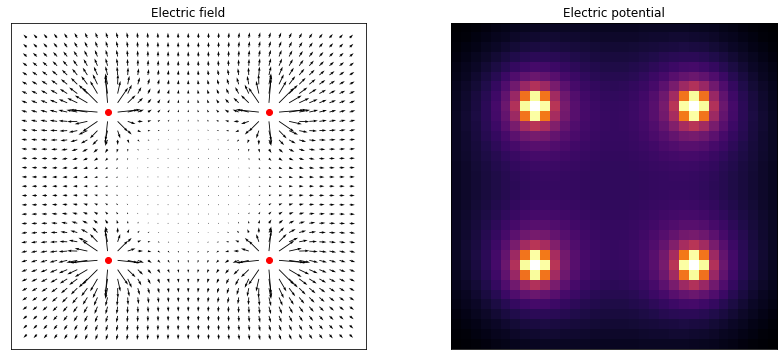

In [100]:
inputs = {
    "limits": 4,
    "delta": 0.25,
}
electric_field = system(inputs["limits"],
                        inputs["delta"])
electric_field.add_particle(1, [2, 2])
electric_field.add_particle(1, [2, -2])
electric_field.add_particle(1, [-2, 2])
electric_field.add_particle(1, [-2, -2])
electric_field.calc_field()
electric_field.calc_potential()
electric_field.plot_potential_and_field()